In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
import pickle

warnings.filterwarnings('ignore')

path = "./drive/MyDrive/Colab Notebooks/Security_Privacy_Project/"

# Load and process the data


*   Load the data
*   Vectorize and store the vector file
*   Create train and test datasets and save the files





In [ ]:
df = pd.read_csv(path+"processed.csv", encoding='utf-16')
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (33757, 2)


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,%29,1
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
4,select * from users where id = '1' or @ @1 = ...,1
5,"select * from users where id = 1 or 1#"" ( un...",1
6,' select name from syscolumns where id = ( ...,1
7,select * from users where id = 1 +$+ or 1 = 1...,1
8,"1; ( load_file ( char ( 47,101,116,99,47,112,9...",1
9,select * from users where id = '1' or ||/1 = ...,1


In [ ]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(33757,) (33757,)
Dataset Input: 
 0                        " or pg_sleep ( __TIME__ ) --
1    create user name identified by pass123 tempora...
2                                                  %29
3    ' AND 1 = utl_inaddr.get_host_address  (  (  S...
4     select * from users where id = '1' or @ @1 = ...
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')
# vectorizer = CountVectorizer(min_df = 2, max_df = 0.7, stop_words = stopwords.words('english'))
vectorizer = pickle.load(open(path + "vectorizer", 'rb'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Save the Vectorizer
with open(path + 'vectorizer', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27005, 10320)
(27005,)
(6752, 10320)
(6752,)


In [ ]:
# Save the processed data

pd.DataFrame(X_train).to_csv(path + 'training_and_testing_data/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv(path + 'training_and_testing_data/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv(path + 'training_and_testing_data/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv(path + 'training_and_testing_data/y_test.csv', index=False)

# Train the Models


*   Train models using differnt Algorithms
*   Store the models as files using pickle



In [ ]:
# Load the train and test data from files

X_train = pd.read_csv(path+"training_and_testing_data/X_train.csv", encoding='utf-8')
X_test = pd.read_csv(path+"training_and_testing_data/X_test.csv", encoding='utf-8')
y_train = pd.read_csv(path+"training_and_testing_data/y_train.csv", encoding='utf-8')
y_test = pd.read_csv(path+"training_and_testing_data/y_test.csv", encoding='utf-8')

In [ ]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

## LOGISTIC REGRESSION

In [ ]:
lr_clf = LogisticRegression(solver='lbfgs')
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

Accuracy of Logistic Regression on test set : 0.9597156398104265
F1 Score of Logistic Regression on test set : 0.936269915651359


In [ ]:
# Save the model

filename = path + "models/lr_model.sav"
pickle.dump(lr_clf, open(filename, 'wb'))

## RANDOM FOREST

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

In [ ]:
# Save the model

filename = path + "models/rf_model.sav"
pickle.dump(rf_clf, open(filename, 'wb'))

## SUPPORT VECTOR MACHINES

In [ ]:
svm_clf = SVC(gamma = 'scale')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

Accuracy of SVM on test set : 0.9582345971563981
F1 Score of SVM on test set : 0.9341121495327103


In [ ]:
# Save the model

filename = path + "models/svm_model.sav"
pickle.dump(svm_clf, open(filename, 'wb'))

## NAIVE BAYES

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

Accuracy of Naive Bayes on test set : 0.5844194312796208
F1 Score of Naive Bayes on test set : 0.6156164383561644


In [ ]:
# Save the model

filename = path + "models/nb_model.sav"
pickle.dump(nb_clf, open(filename, 'wb'))

## DECISION TREES


In [ ]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

Accuracy of Naive Bayes on test set : 0.9552725118483413
F1 Score of Naive Bayes on test set : 0.9307021569527305


In [ ]:
# Save the model

filename = path + "models/dt_model.sav"
pickle.dump(DT, open(filename, 'wb'))

## Gradient Boosting

In [ ]:

lr_list = [0.8, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.8
Accuracy score (training): 0.690
Accuracy score (validation): 0.695
Learning rate:  1
Accuracy score (training): 0.690
Accuracy score (validation): 0.695


In [ ]:
# Save the model

filename = path + "models/gd_model.sav"
pickle.dump(gb_clf, open(filename, 'wb'))

# Load the saved Classifiers
* load test data
* load ML models

In [ ]:
# Load the test data from files

X_test = pd.read_csv(path+"training_and_testing_data/X_test.csv", encoding='utf-8')
y_test = pd.read_csv(path+"training_and_testing_data/y_test.csv", encoding='utf-8')

f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

In [ ]:
# load all models from storage

lr = pickle.load(open(path + "models/lr_model.sav", 'rb'))
# svm = pickle.load(open(path + "models/svm_model.sav", 'rb'))
gd = pickle.load(open(path + "models/gd_model.sav", 'rb'))
nb = pickle.load(open(path + "models/nb_model.sav", 'rb'))
dt = pickle.load(open(path + "models/dt_model.sav", 'rb'))
rf = pickle.load(open(path + "models/rf_model.sav", 'rb'))

In [ ]:
# perform predictions

lr_pred = lr.predict(X_test)
# svm_pred = svm.predict(X_test)
gd_pred = gd.predict(X_test)
nb_pred = nb.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [ ]:
# Updates model scores to f1_dict

f1_dict["LogisticRegression"] = f1_score(lr_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(lr_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(lr_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(lr_pred, y_test)

f1_dict["RandomForest"] = f1_score(rf_pred, y_test)
precision_dict["RandomForest"] = precision_score(rf_pred, y_test)
recall_dict["RandomForest"] = recall_score(rf_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(rf_pred, y_test)

# f1_dict["SVM"] = f1_score(svm_pred, y_test)
# precision_dict["SVM"] = precision_score(svm_pred, y_test)
# recall_dict["SVM"] = recall_score(svm_pred, y_test)
# accuracy_dict['SVM'] = accuracy_score(svm_pred, y_test)

f1_dict["NaiveBayes"] = f1_score(nb_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(nb_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(nb_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(nb_pred, y_test)

f1_dict["DecisionTree"] = f1_score(dt_pred, y_test)
precision_dict["DecisionTree"] = precision_score(dt_pred, y_test)
recall_dict["DecisionTree"] = recall_score(dt_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(dt_pred, y_test)

f1_dict["Gradient Boosting"] = f1_score(gd_pred, y_test)
precision_dict["Gradient Boosting"] = precision_score(gd_pred, y_test)
recall_dict["Gradient Boosting"] = recall_score(gd_pred, y_test)
accuracy_dict["Gradient Boosting"] = accuracy_score(gd_pred, y_test)

# Plot for Models Performances

In [ ]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,LogisticRegression,RandomForest,NaiveBayes,DecisionTree,Gradient Boosting
F1_Score,0.936270,0.937297,0.620424,0.930702,0.164028
Precision,0.883680,0.892525,0.996904,0.896948,0.089341
Recall,0.995516,0.986797,0.450350,0.967096,1.000000
Accuracy,0.959716,0.960012,0.591528,0.955273,0.695053


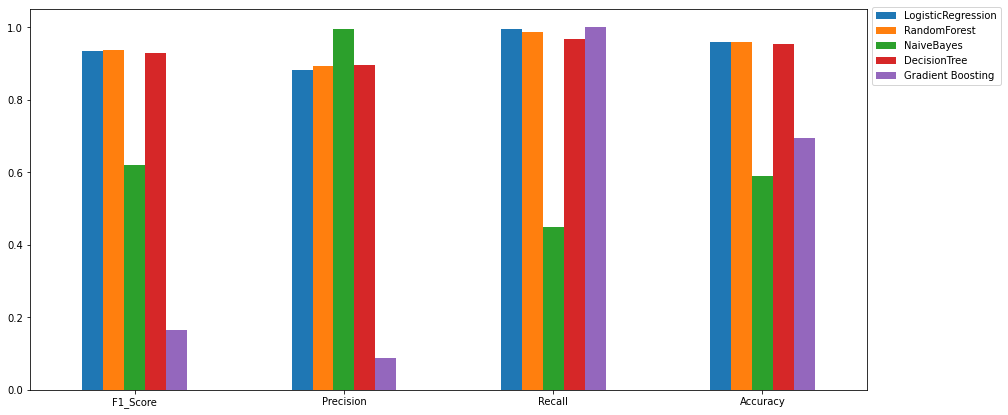

In [ ]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

 Manual Testing

In [ ]:
# Execute these to load the requirements
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import seaborn as sns
import pickle

myvectorizer = pickle.load(open(path + "vectorizer", 'rb'))

In [ ]:
input_val="1, ( select  ( case when  ( 1609 = 1609 )  then waitfor delay '0:0:5' else 1609* ( select 1609 from master..sysdatabases )  end  )  )  "
input_val=[input_val]
input_val=myvectorizer.transform(input_val).toarray()

mymodel = pickle.load(open(path + "models/lr_model.sav", 'rb'))
result=mymodel.predict(input_val)

print(result)


[1]
